In [75]:

import matplotlib.pyplot as plt
import numpy as np

In [82]:
cq_filename = "coh2_321g_pb4d_CDIIS.out"

cq_pp_list = []
cq_pe_list = []
cq_energy_list = []

with open(cq_filename, 'r') as f:
    for line in f.readlines():
        if 'Subsystem 1 RMSD:' in line:     
            cq_pp_list.append(float(line.split()[3]))
            continue
        if 'Subsystem 3 RMSD:' in line:     
            cq_pe_list.append(float(line.split()[3]))
            continue
        if 'SCFIt:' in line:     
            cq_energy_list.append(float(line.split()[2]))
            continue
cq_pp = np.array(cq_pp_list)
cq_pe = np.array(cq_pe_list)
cq_energy = np.array(cq_energy_list)

In [83]:
cq_energy -= cq_energy[-1]
cq_scf_iter = np.arange(1,cq_energy.size+1,1)

In [84]:
gau_filename = "coh2_smt_321g_pb4d.log"

gau_pp_list = []
gau_pe_list = []
gau_energy_list = []

with open(gau_filename, 'r') as f:
    for line in f.readlines():
        if 'RMSDPP' in line:     
            gau_pp_list.append(float(line.split()[1]))
            continue
        if 'RMSDPE' in line:     
            gau_pe_list.append(float(line.split()[1]))
            continue
        if 'The Energy for This Iteration is: ' in line:     
            gau_energy_list.append(float(line.split()[6]))
            continue
gau_pp = np.array(gau_pp_list)
gau_pe = np.array(gau_pe_list)
gau_energy = np.array(gau_energy_list)

In [85]:
gau_energy -= gau_energy[-1]
gau_scf_iter = np.arange(1,gau_energy.size+1,1)

In [86]:
gau_pe.size

81

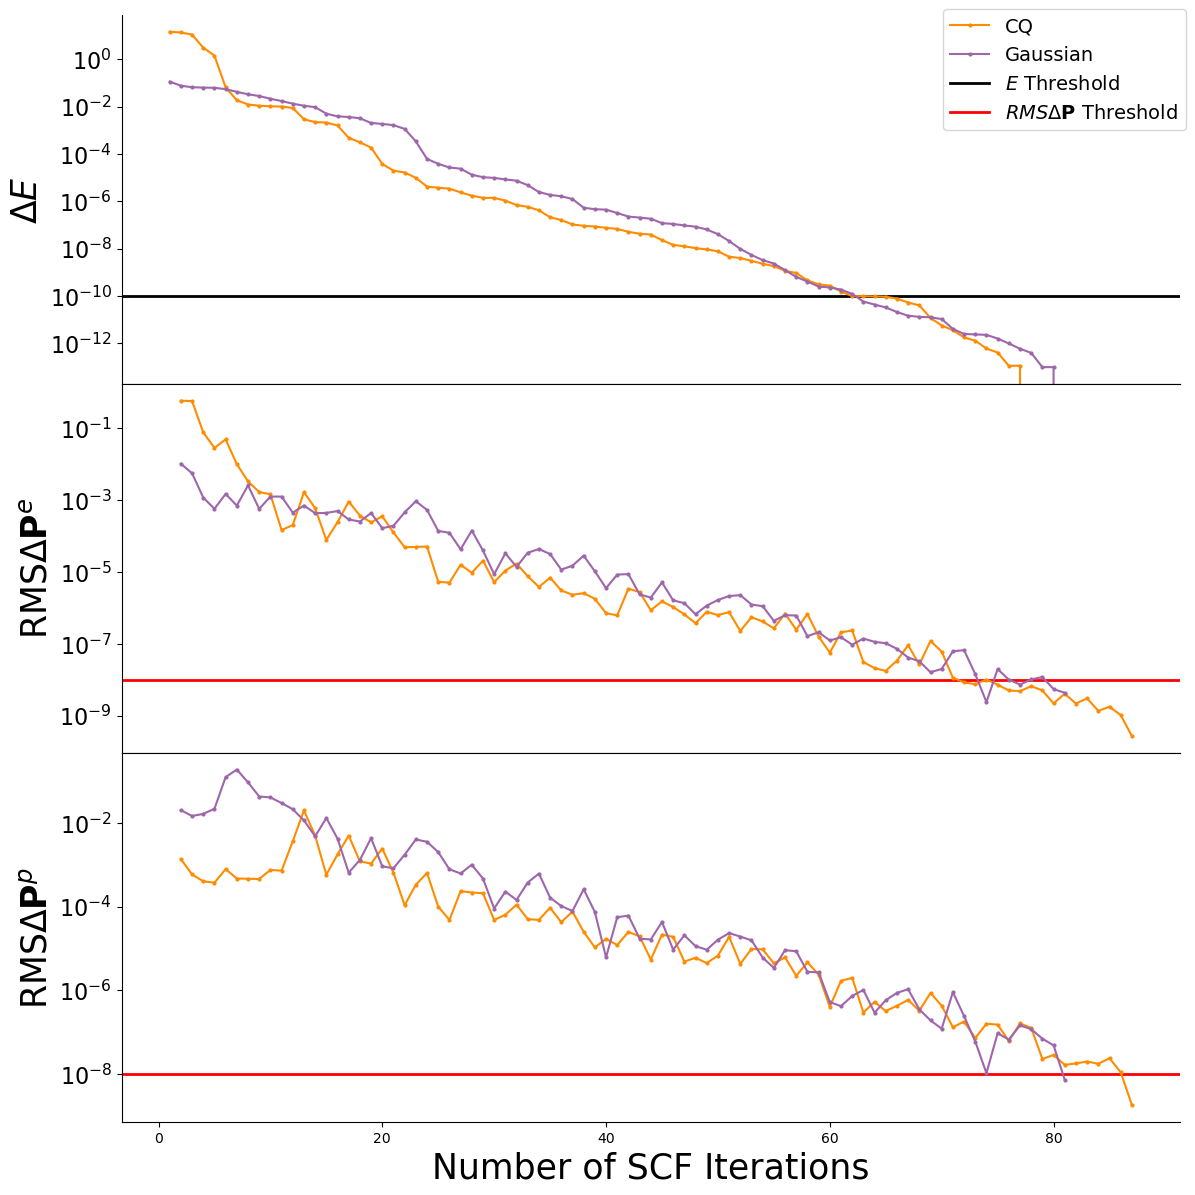

In [87]:
plt.style.use('default')
fig, ax = plt.subplots(3, 1,figsize =(12, 12), sharex=True, sharey='row', gridspec_kw={'hspace': 0},tight_layout=True)
ax[0].plot(cq_scf_iter,cq_energy,'o-',c='darkorange',ms=2,label="CQ")
ax[0].plot(gau_scf_iter,gau_energy,'o-',c='#9e66ab',ms=2,label="Gaussian")
ax[0].axhline(y=10**(-10),xmin=0,xmax=len(cq_scf_iter)+1,c="black",linewidth=2,zorder=0,label='$E$ Threshold')
ax[0].set_yscale("log")
ax[0].set_ylabel("$ \Delta E}$",fontsize=25)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].plot(cq_scf_iter[1:],cq_pe,'o-',c='darkorange',ms=2)
ax[1].plot(gau_scf_iter[1:],gau_pe[1:],'o-',c='#9e66ab',ms=2)
ax[1].axhline(y=10**(-8),xmin=0,xmax=len(cq_scf_iter)+1,c="red",linewidth=2,zorder=0,label='$RMS \Delta \mathbf{P} $ Threshold')
ax[1].set_yscale("log")
ax[1].set_ylabel("RMS$ \Delta \mathbf{P} ^e$",fontsize=25)
ax[1].spines['right'].set_visible(False)

ax[2].plot(cq_scf_iter[1:],cq_pp,'o-',c='darkorange',ms=2)
ax[2].plot(gau_scf_iter[1:],gau_pp[1:],'o-',c='#9e66ab',ms=2)
ax[2].axhline(y=10**(-8),xmin=0,xmax=len(cq_scf_iter)+1,c="red",linewidth=2,zorder=0)
ax[2].set_yscale("log")
ax[2].set_ylabel("RMS$ \Delta \mathbf{P} ^p$",fontsize=25)
ax[2].set_xlabel("Number of SCF Iterations", fontsize=25)
ax[2].spines['right'].set_visible(False)

ax[0].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)
ax[2].tick_params(axis='y', labelsize=16)


fig.set_facecolor('w')
lines_labels = [axes.get_legend_handles_labels() for axes in ax]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,fontsize=14,loc='upper right')

plt.tight_layout()
plt.savefig('./coh2_321g_pb4d.pdf', dpi=3600)

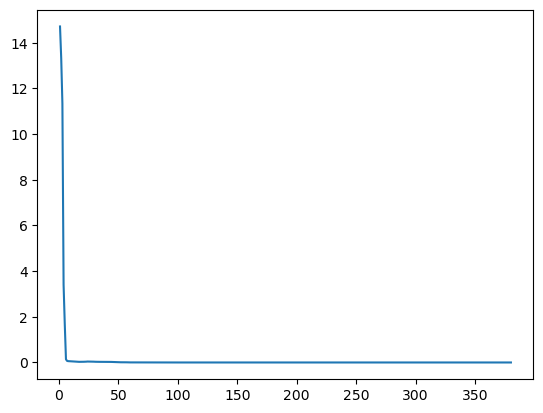

In [56]:
plt.plot(cq_scf_iter, cq_)

NameError: name 'Energy' is not defined